In [1]:
from pathlib import Path
from IPython.display import Image

from data_utils import load_params, load_results, convert_test_scores_to_sample_scores
from eval import calculate_cf_matrix, plot_cf_matrix, plot_negative_roc
import yaml

# Load data

In [2]:
# import parameters
params_path = Path('./params.yml')
import_params = load_params(params_path, 'import_params')

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

,image_name,category,sample,revolution,trigger,negative_score,prediction,truth
0,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,BeschSW,38,2,5,0.261207,0,0
1,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,KratzerSW,15,2,8,0.426361,0,1
2,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,Airline,14,4,9,0.794711,1,1
3,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,KratzerSW,67,8,10,0.473823,0,1
4,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,Airline,14,10,7,0.564196,1,1
...,...,...,...,...,...,...,...,...
3601,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,Airline,10,10,4,0.323703,0,1
3602,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,KratzerSW,41,3,4,0.354875,0,0
3603,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,Airline,5,10,4,0.398428,0,1
3604,/home/tonytrieu/datasets/Cilag/C82/C82_Seitenw...,Airline,51,2,4,0.435466,0,1


# Filter categories and save data frame

In [3]:
# filter relevant categories
include_categories = [
    'Airline',
    'Verformt',
    'BeschStopfen_',
    'MarkStopfen_',
    'PartikelIglo_',
    'FaserStopfen',
    'LyoStopfen',
    'Gut'
]

with open(params_path, 'r') as file:
    params = yaml.safe_load(file)
    export_params = params['export_params']

# df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
path_image_based_csv = export_params['export_path'] + r'\image_based_scores.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

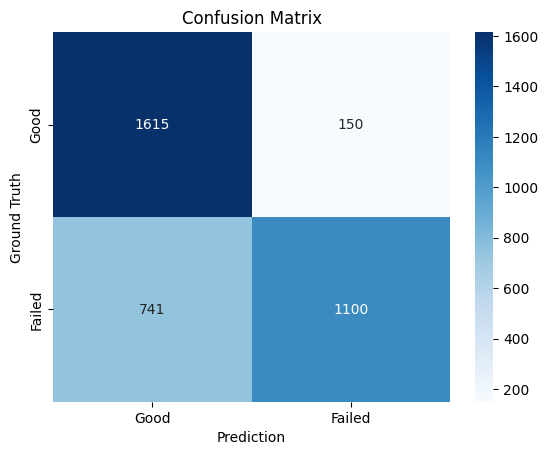

In [4]:
# evaluation parameters
prediction_class_to_value_map = {'Good': 0, 'Failed': 1}
prediction_classes = ['Good', 'Failed']

# creating confusion matrix
y_true = df_results_image_based.truth
y_pred = df_results_image_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
export_path = Path(export_params['export_path'])
save_path_cf_matrix = export_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

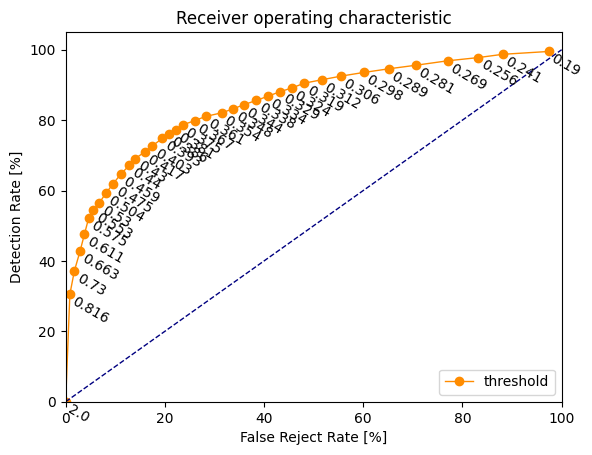

In [5]:
# plotting and saving ROC curve
y_scores = df_results_image_based.negative_score
save_path_ROC_curve = export_path / 'image_based_ROC_curve.png'

plot_negative_roc(y_true, y_scores, save_path_ROC_curve, n = 30, negative_label=1)

# Sample-based evaluation

In [6]:
category_map = import_params.category_map

df_results_sample_based = df_results_image_based.copy()
df_results_sample_based = convert_test_scores_to_sample_scores(df_results_sample_based, category_map)
df_results_sample_based

prediction  negative_score  truth
category  sample revolution                                   
Airline   1      1                    1        0.939278      1
                 2                    1        0.945845      1
                 4                    1        0.962672      1
                 5                    1        0.791627      1
                 6                    1        0.822535      1
...                                 ...             ...    ...
KratzerSW 75     6                    0        0.268896      1
                 7                    0        0.255648      1
                 8                    0        0.297988      1
                 9                    0        0.307671      1
                 10                   1        0.568506      1

[1849 rows x 3 columns]

In [7]:
# save sample based data frame to csv file
save_path_sample_based_csv= export_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

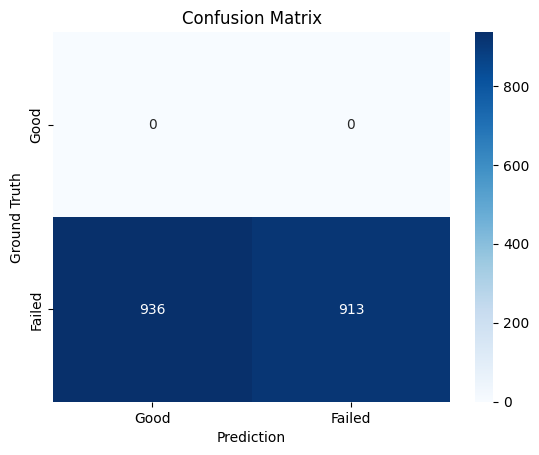

In [8]:
# creating confusion matrix
y_true = df_results_sample_based.truth
y_pred = df_results_sample_based.prediction
cf_matrix = calculate_cf_matrix(y_true, y_pred, prediction_class_to_value_map, prediction_classes)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, prediction_classes)

c:\Users\1699\VirtualEnv\tony\lib\site-packages\sklearn\metrics\_ranking.py:1009: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


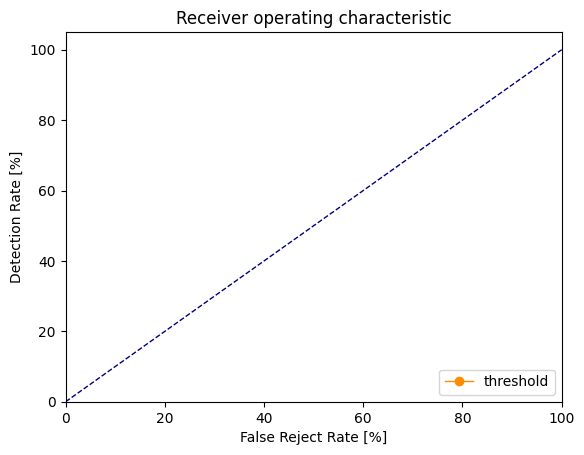

In [9]:
# plotting and saving ROC curve
y_scores = df_results_sample_based.negative_score
save_path_ROC_curve = export_path / 'sample_based_ROC_curve.png'

plot_negative_roc(y_true, y_scores, save_path_ROC_curve, n = 5, negative_label=1)